In [1]:
#Load libraries
import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange, uniform
#import KNN

In [2]:
bike_data =  pd.read_csv("Day.csv", index_col = 0)

# Missing Value Analysis

In [3]:
#Calculating the null values in the dataframe
missing_value = pd.DataFrame(bike_data.isnull().sum())
missing_value = (missing_value/len(bike_data))*100
missing_value.reset_index()

missing_value = missing_value.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
#Arranging Missing Values in Decreasing Order
missing_value = missing_value.sort_values('Missing_percentage', ascending = False)
#save output results 
missing_value.to_csv("Missing_perc.csv", index = False)
missing_value

##There is no missing value in the dataframe

,Missing_percentage
dteday,0.0
season,0.0
yr,0.0
mnth,0.0
holiday,0.0
weekday,0.0
workingday,0.0
weathersit,0.0
temp,0.0
atemp,0.0


# Outlier Analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1910ce80>,
 'caps': [<matplotlib.lines.Line2D at 0x1a19123828>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1910ccf8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a19123eb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a19123f98>],
 'means': []}

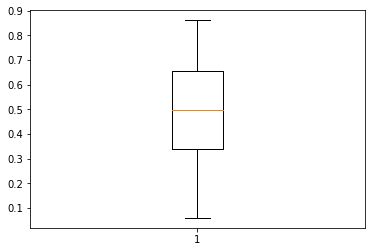

In [4]:
%matplotlib inline

plt.boxplot(bike_data.temp)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1924add8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a192554a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1924a9e8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a19255b38>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a19255e80>],
 'means': []}

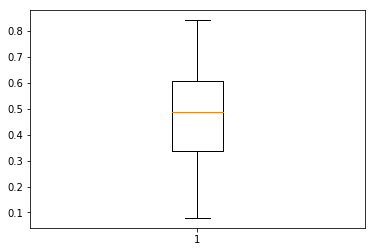

In [5]:
%matplotlib inline

plt.boxplot(bike_data.atemp)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a193e8cf8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a193f23c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a193e88d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a193f2a58>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a193f2da0>],
 'means': []}

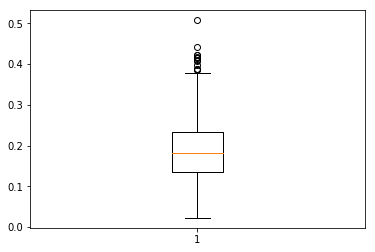

In [7]:
plt.boxplot(bike_data.windspeed)

#Positeve outlier found in windspeed

{'whiskers': [<matplotlib.lines.Line2D at 0x1a194486d8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a19448d68>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a194482e8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a194bd438>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a194bd780>],
 'means': []}

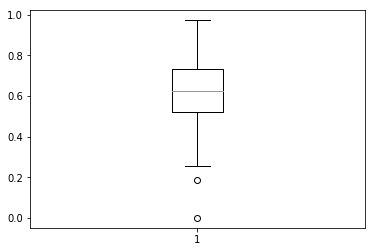

In [8]:
%matplotlib inline

plt.boxplot(bike_data.hum)

#Negetive outlier found in hum

In [9]:
cnames = ["dteday","yr","season","mnth","workingday","weekday","weathersit","temp","atemp","hum","windspeed"]
pnames = ["temp","hum","windspeed"]

In [10]:
#Detect & Delete Outliers
for i in pnames :
    print (i)
    q75,q25 = np.percentile(bike_data.loc[:,i],[75,25])
    iqr = q75-q25
    
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print (min)
    print (max)
    
    bike_data = bike_data.drop(bike_data[bike_data.loc[:,i] < min].index)
    bike_data = bike_data.drop(bike_data[bike_data.loc[:,i] > max].index)

temp
-0.14041600000000015
1.1329160000000003
hum
0.20468725
1.0455212500000002
windspeed
-0.012431000000000025
0.380585


# Feature Engineering

In [11]:
bike_data.dteday = pd.to_datetime(bike_data.dteday, yearfirst=True)
bike_data.season = bike_data.season.astype('category')
bike_data.yr = bike_data.yr.astype('category')
bike_data.mnth = bike_data.mnth.astype('category')
bike_data.holiday = bike_data.holiday.astype('category')
bike_data.weekday = bike_data.weekday.astype('category')
bike_data.workingday = bike_data.workingday.astype('category')
bike_data.weathersit = bike_data.weathersit.astype('category')

bike_data.temp = bike_data.temp.astype('float')
bike_data.atemp = bike_data.atemp.astype('float')
bike_data.hum = bike_data.hum.astype('float')
bike_data.windspeed = bike_data.windspeed.astype('float')
bike_data.casual = bike_data.casual.astype('float')
bike_data.registered = bike_data.registered.astype('float')
bike_data.cnt = bike_data.cnt.astype('float')

In [12]:
print(bike_data.dtypes)

dteday        datetime64[ns]
season              category
yr                  category
mnth                category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual               float64
registered           float64
cnt                  float64
dtype: object


# Feature Selection

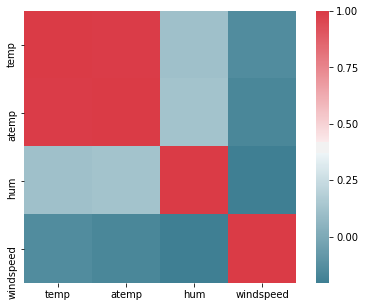

In [13]:
##Feature selection o the basis of various features like correlation, multicollinearity.
#Correlation Plot
df_corr = bike_data.loc[:,cnames]
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [14]:
#Chi Square Test of Independence
#Saving Categorical Numbers
cat_names = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]

In [15]:
from scipy.stats import chi2_contingency
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(bike_data['cnt'], bike_data[i]))
    print(dof)

season
2049
yr
683
mnth
7513
holiday
683
weekday
4098
workingday
683
weathersit
1366


In [16]:
#Removing variables atemp beacuse it is highly correlated with temp,
#Removing weekday,holiday because they don't provide much to the independent variable
#Removing Causal and registered becuase that's what we need to predict.

bike_data = bike_data.drop(['atemp','holiday','workingday','casual','registered'], axis =1)

# Exploratory Data Analysis

/Users/apple/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


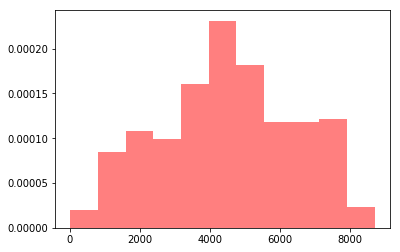

In [17]:
#Distribution of cnt
%matplotlib inline

num_bins = 11
plt.hist(bike_data['cnt'], num_bins, normed=1, facecolor='red', alpha=0.5)
plt.show()

mnth
1     61
2     53
3     58
4     58
5     62
6     60
7     62
8     62
9     60
10    60
11    60
12    61
dtype: int64


Text(0, 0.5, 'Total Bikes Rented')

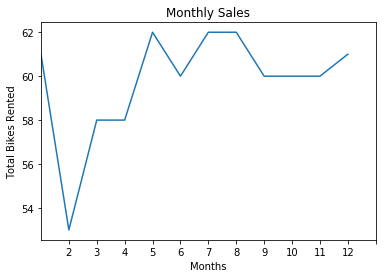

In [18]:
#Bike Rentals Monthly
sales_by_month = bike_data.groupby('mnth').size()
print(sales_by_month)
#Plotting the Graph
plot_by_month = sales_by_month.plot(title='Monthly Sales',xticks=(1,2,3,4,5,6,7,8,9,10,11,12))
plot_by_month.set_xlabel('Months')
plot_by_month.set_ylabel('Total Bikes Rented')

Text(0, 0.5, 'Total Bikes Rented')

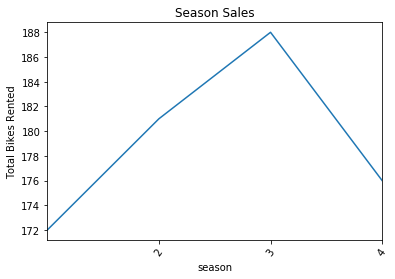

In [19]:
#Sales by Season
sales_by_weekday = bike_data.groupby('season').size()
plot_by_day = sales_by_weekday.plot(title='Season Sales',xticks=(range(1,4)),rot=55)
plot_by_day.set_xlabel('season')
plot_by_day.set_ylabel('Total Bikes Rented')

# Model Development

In [20]:
#Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [47]:
#Divide data into train and test
X = bike_data.values[:,1:9]
Y = bike_data.values[:,9]

X_train,y_train,X_test,y_test = train_test_split( X, Y, test_size = 0.2)

# Decision Tree

In [48]:
fit_DT = DecisionTreeRegressor(max_depth=4).fit(X_train, X_test)
#Apply model on test data
predictions_DT = fit_DT.predict(y_train)
#errors = abs(predictions - y_test)

In [49]:
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

MAPE(y_test, predictions_DT)

17.30019040428621

In [50]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 84.82 %.


# Rendom Forest

In [51]:
from sklearn.ensemble import RandomForestRegressor

#RF_model = RandomForestRegressor(n_estimators = 100).fit(X_train, y_train)
RF_model = RandomForestRegressor(n_estimators = 1000, random_state = 1337)
# Train the model on training data
RF_model.fit(X_train, X_test);

# Use the forest's predict method on the test data
predictions = RF_model.predict(y_train)
# Calculate the absolute errors
errors = abs(predictions - y_test)

In [52]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 87.38 %.
